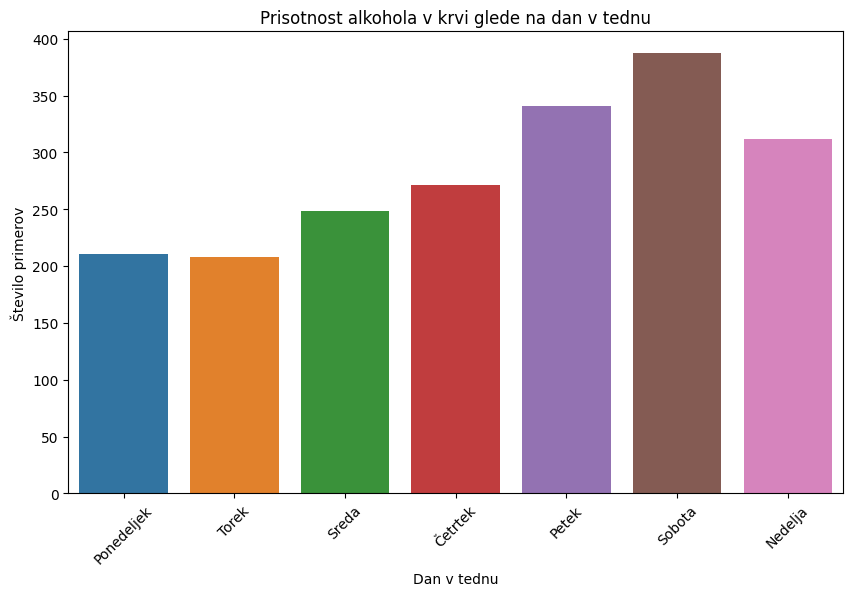

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

faktor_oseb = pd.read_csv('./baze/manjse/FaktorOseb.csv')
cas = pd.read_csv('./baze/manjse/Cas.csv')
faktor_oseb_subset = faktor_oseb[['ZaporednaStevilkaOsebeVPN', 'UporabaVarnostnegaPasu', 'VrednostAlkotesta', 'VrednostStrokovnegaPregleda']]
cas_subset = cas[['ZaporednaStevilkaOsebeVPN', 'DatumPN']]

podatki = pd.merge(faktor_oseb_subset, cas_subset, on='ZaporednaStevilkaOsebeVPN', how='left')

podatki['DatumPN'] = pd.to_datetime(podatki['DatumPN'], format='%d.%m.%Y')

dnevi_v_tednu = {
    'Monday': 'Ponedeljek',
    'Tuesday': 'Torek',
    'Wednesday': 'Sreda',
    'Thursday': 'Četrtek',
    'Friday': 'Petek',
    'Saturday': 'Sobota',
    'Sunday': 'Nedelja'
}
podatki['DanVtednu'] = podatki['DatumPN'].dt.day_name().map(dnevi_v_tednu)
podatki['VrednostAlkotesta'] = podatki['VrednostAlkotesta'].str.replace(',', '.').astype(float)
podatki['AlkoholPrisoten'] = podatki['VrednostAlkotesta'].apply(lambda x: 1 if x > 0 else 0)
podatki = podatki[podatki['AlkoholPrisoten'] == 1]


uredjeni_dnevi = ['Ponedeljek', 'Torek', 'Sreda', 'Četrtek', 'Petek', 'Sobota', 'Nedelja']
podatki['DanVtednu'] = pd.Categorical(podatki['DanVtednu'], categories=uredjeni_dnevi, ordered=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='DanVtednu', data=podatki)
plt.title('Prisotnost alkohola v krvi glede na dan v tednu')
plt.xlabel('Dan v tednu')
plt.ylabel('Število primerov')
plt.xticks(rotation=45)
plt.show()

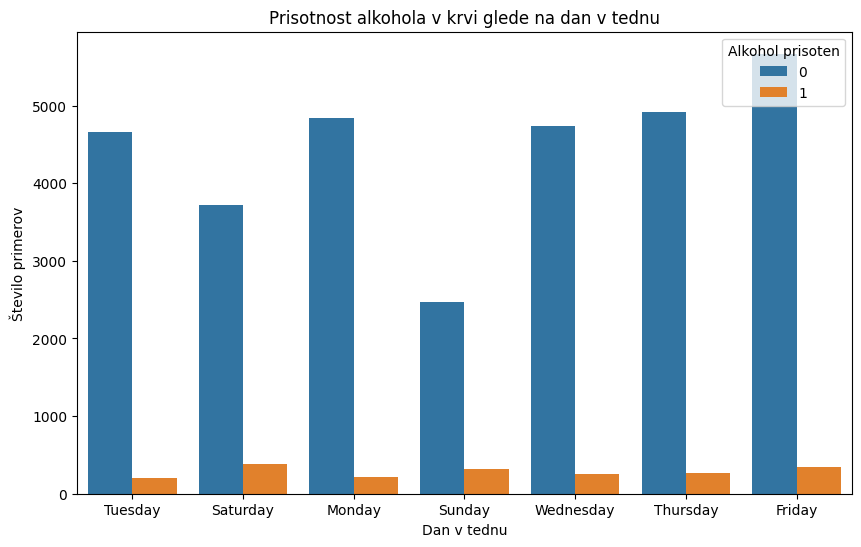

In [2]:


faktor_oseb_subset = faktor_oseb[['ZaporednaStevilkaOsebeVPN', 'UporabaVarnostnegaPasu', 'VrednostAlkotesta', 'VrednostStrokovnegaPregleda']]
cas_subset = cas[['ZaporednaStevilkaOsebeVPN', 'DatumPN']]


podatki = pd.merge(faktor_oseb_subset, cas_subset, on='ZaporednaStevilkaOsebeVPN', how='left')


podatki['DatumPN'] = pd.to_datetime(podatki['DatumPN'], format='%d.%m.%Y')


podatki['DanVtednu'] = podatki['DatumPN'].dt.day_name()


podatki['VrednostAlkotesta'] = podatki['VrednostAlkotesta'].str.replace(',', '.').astype(float)

podatki['AlkoholPrisoten'] = podatki['VrednostAlkotesta'].apply(lambda x: 1 if x > 0 else 0)


plt.figure(figsize=(10, 6))
sns.countplot(x='DanVtednu', hue='AlkoholPrisoten', data=podatki)
plt.title('Prisotnost alkohola v krvi glede na dan v tednu')
plt.xlabel('Dan v tednu')
plt.ylabel('Število primerov')
plt.legend(title='Alkohol prisoten', loc='upper right')
plt.show()